In [57]:
# Importing all necessary modules

import matplotlib as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('ggplot')

In [58]:
df = pd.read_csv('twitter_archive_master.csv', dtype={'tweet_id': 'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2051 non-null   object 
 1   created_at          2051 non-null   object 
 2   source              2051 non-null   object 
 3   text                2051 non-null   object 
 4   character_count     2051 non-null   int64  
 5   name                1423 non-null   object 
 6   dog                 2051 non-null   bool   
 7   breed               2051 non-null   object 
 8   rating_numerator    2051 non-null   float64
 9   rating_denominator  2051 non-null   int64  
 10  dog_type            307 non-null    object 
 11  rating_ratio        2051 non-null   float64
 12  favorite_count      2051 non-null   int64  
 13  retweet_count       2051 non-null   int64  
 14  expanded_urls       2051 non-null   object 
 15  jpg_url             2051 non-null   object 
dtypes: boo

In [59]:
df.head(3)

,tweet_id,created_at,source,text,character_count,name,dog,breed,rating_numerator,rating_denominator,dog_type,rating_ratio,favorite_count,retweet_count,expanded_urls,jpg_url
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter iPhone,This is Phineas. He's a mystical boy. Only eve...,85,Phineas,False,orange,13.0,10,NaN,1.3,39467,8853,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter iPhone,This is Tilly. She's just checking pup on you....,138,Tilly,True,chihuahua,13.0,10,NaN,1.3,33819,6514,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter iPhone,This is Archie. He is a rare Norwegian Pouncin...,121,Archie,True,chihuahua,12.0,10,NaN,1.2,25461,4328,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg


In [60]:
# Since the minimum values of rating_numerator,rating_ratio,and favorite_count are zero respectively,
# Hence, there is need to handle this issue.

df.describe()

,character_count,rating_numerator,rating_denominator,rating_ratio,favorite_count,retweet_count
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,111.719649,12.237338,10.521697,1.165908,8527.893710,2950.543637
std,26.143299,40.889129,7.215897,4.007080,12049.556241,5000.732425
min,13.000000,0.000000,10.000000,0.000000,0.000000,16.000000
25%,94.000000,10.000000,10.000000,1.000000,1675.000000,634.500000
50%,116.000000,11.000000,10.000000,1.100000,3855.000000,1403.000000
75%,137.000000,12.000000,10.000000,1.200000,10940.000000,3443.000000
max,148.000000,1776.000000,170.000000,177.600000,132810.000000,79515.000000


In [61]:
# Checking for the numbers of zero values in rating_numerator,rating_ratio,and favorite_count respectively
df.query('rating_numerator ==0').count()['tweet_id']

2

In [62]:
df.query('rating_ratio ==0').count()['tweet_id']

2

In [63]:
df.query('favorite_count ==0').count()['tweet_id']

76

In [64]:
# There are 2, 2 and 76 zero values in rating_numerator,rating_ratio,and favorite_count respectively
# Hence, I replaced them with null.
df['rating_numerator'] = df['rating_numerator'].replace(0, np.nan) 
df['rating_ratio'] = df['rating_ratio'].replace(0, np.nan) 
df['favorite_count'] = df['favorite_count'].replace(0, np.nan) 

In [65]:
# Confirming if the zero values have been replaced with null
df.describe()

,character_count,rating_numerator,rating_denominator,rating_ratio,favorite_count,retweet_count
count,2051.000000,2049.000000,2051.000000,2049.000000,1975.000000,2051.000000
mean,111.719649,12.249283,10.521697,1.167046,8856.055696,2950.543637
std,26.143299,40.907301,7.215897,4.008870,12160.348292,5000.732425
min,13.000000,1.000000,10.000000,0.100000,81.000000,16.000000
25%,94.000000,10.000000,10.000000,1.000000,1976.000000,634.500000
50%,116.000000,11.000000,10.000000,1.100000,4099.000000,1403.000000
75%,137.000000,12.000000,10.000000,1.200000,11306.000000,3443.000000
max,148.000000,1776.000000,170.000000,177.600000,132810.000000,79515.000000


##  Corrolation map plot of the relationship between the variables

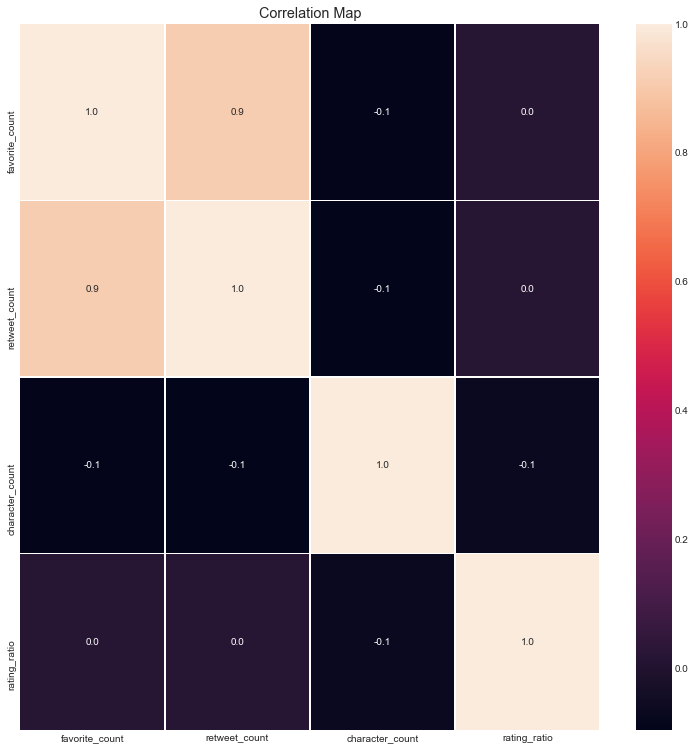

In [79]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df[[ 'favorite_count','retweet_count','character_count',
                'rating_ratio']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation Map');
plt.savefig('correlation_map.png');

- Favorites and retweet counts are the only strong correlation of 0.9 on the figure above, this is usual because the more the  forvorites the more the retweets.
- Charcter count have weak negative correlation of -0.1 on favorites, retweet and rating prediction.
- Rating do not affect favorites and retweet but it does affect character in a negative way (-0.1)

## Scatter Plot of Tweet Retweet Vs Favorites.

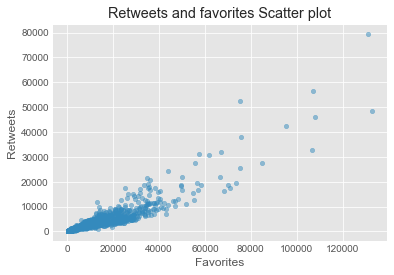

In [67]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.savefig('plot_retweet _vs_favorites.png');

- The scattered plot shows that retweet is high correlated with favorites.

## Retweets and favorites over time

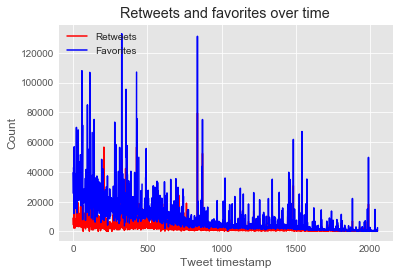

In [68]:
df['retweet_count'].plot(color = 'red', label='Retweets')
df['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show();

- From the graph above, the we can see that we have more favorites than retweets.


### Top Breeds

In [69]:
# Breed count

breed_count = df.query('dog == True')\
.groupby('breed').count()[['tweet_id']]\
.sort_values('tweet_id', ascending=False)[:20]

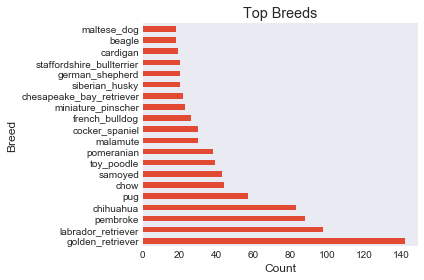

In [70]:
breed_count.plot(kind='barh', legend=False)
plt.title("Top Breeds")
plt.xlabel("Count")
plt.ylabel("Breed")
plt.grid()
plt.tight_layout()

fig = plt.gcf() 
fig.savefig('top_breeds.png', bbox_inches='tight');

The top breed identified in the gragh above is golden retriever followed by Labrador retriever.

In [71]:
# Average likes and retweets of top dogs
avg_likes_retweets = df.query('dog == True').groupby('breed').mean()[['favorite_count', 'retweet_count']]
avg_likes_retweets['count'] = df.query('dog == True').groupby('breed').count()[['tweet_id']]

In [72]:
# variable correlation

avg_likes_retweets.corr()

,favorite_count,retweet_count,count
favorite_count,1.000000,0.847561,0.198977
retweet_count,0.847561,1.000000,0.235664
count,0.198977,0.235664,1.000000


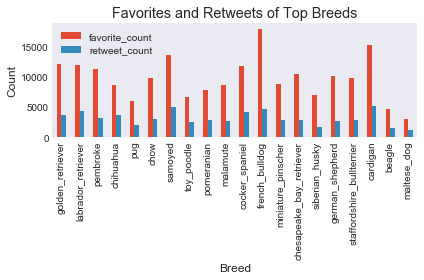

In [73]:
# Favorites and retweets of top dog breeds

avg_likes_retweets.sort_values('count', ascending=False)[['favorite_count', 'retweet_count']][:20]\
.plot(kind='bar')
plt.title('Favorites and Retweets of Top Breeds')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.savefig('breed_favorites_retweets.png');

The frequency of a particular breed does not necessary mean there is strong correlation with either mean favorite or retweet count as it shows 0.19 and 0.23 respectively.